In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

%matplotlib inline

In [2]:
# Load data. Must happen every time because loops below mutate data
%run courses.py

# Create 'transcript' dataframe holding all completed courses
tra = pd.DataFrame()

for key in completed:
    for c in completed[key]:
        c.insert(0, key)
    df = pd.DataFrame(completed[key], columns=['faculty', 'code', 'title', 'grade', 'term']);
    df.set_index('title', drop=True, inplace=True)
    tra = tra.append(df);

In [3]:
# Load data. Must happen every time because loops below mutate data
%run courses.py

# Create 'prospective' dataframe holding all idea courses
pro = pd.DataFrame()

for key in ideas:
    for i in ideas[key]:
        i.insert(0, key)
        # Courses that do not include a priority number
        if (len(i) == 4):
            i.append(-1)
    df = pd.DataFrame(ideas[key], columns=['faculty', 'code', 'title', 'offering', 'plan']);
    df.set_index('title', drop=True, inplace=True)
    pro = pro.append(df)

In [17]:
# Display courses from any given term
if True: display(tra[tra['term'] == '3A'])

,faculty,code,grade,term
title,,,,
Intro to Optimization,CO,250,79,3A
Intro to Graph Theory,CO,342,70,3A
Intro to Mathematical Logic,PMATH,330,93,3A
Great Works: Ancient & Medieval,PHIL,283,88,3A
History of Pop Music,MUSIC,140,90,3A


In [5]:
coop_courses = ['PD', 'WKRPT']

# Drop counts for courses that were taken twice
tra_uni = tra.drop_duplicates(subset=['faculty', 'code']);

# Count list of courses taken per course code (MATH, CS, STAT, etc)
tra_code = pd.value_counts(tra_uni['faculty'].values)
tra_code = pd.DataFrame(tra_code, columns=['total'])

# Calculate and store the mean grade within each faculty
tra_avg = tra.replace(['WD', 'CR', -1], np.nan).groupby('faculty')['grade'].mean()
tra_avg = pd.DataFrame(tra_avg)

# Add column for mean grade. Drop coop related courses
tra_code = pd.concat([tra_code, tra_avg], axis=1)
tra_code.drop(coop_courses, inplace=True)

# Map course 'theme' based on faculty.
tra_code['theme'] = tra_code.index.map(lambda x : themes[x])

# Count list of courses taken per course theme (MATH, PHILOSOPHY, LANGUAGE, etc)
tra_theme = (pd.DataFrame(tra_code.groupby('theme')['total'].sum()))

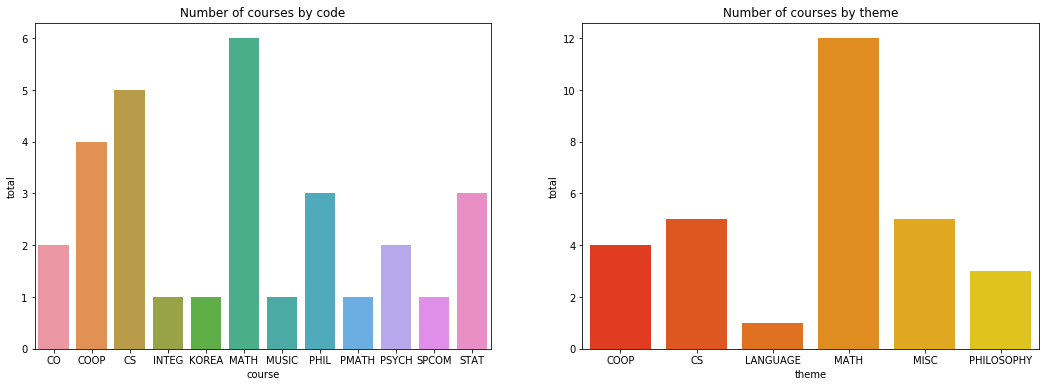

In [6]:
sns.set_palette('autumn')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x=tra_code.index, y='total', data=tra_code, ax=ax1);
sns.barplot(x=tra_theme.index, y='total', data=tra_theme, ax=ax2);
ax1.set_title('Number of courses by code')
ax2.set_title('Number of courses by theme')
ax1.set_xlabel('course');

In [7]:
# TODO: Create dataframe of courses designated 'study of thinking'

In [22]:
%run requirements.py

# View quantitative requirements
reqs_all = reqs(tra)
if False: display(reqs_all)

# View requirements that still need to be satisfied
if True: display(reqs_all[reqs_all['need'] > 0])

,max,min,actual,need
TOTAL,50,40,30.0,10.0
TERMS,100,8,6.0,2.0
MATHS,50,26,17.0,9.0
UPPER MATHS,50,10,4.0,6.0
COOP,6,5,3.0,2.0
PD,6,5,4.0,1.0
WKRPT,5,4,3.0,1.0
CS,50,8,5.0,3.0
UPPER CS,50,6,3.0,3.0


In [26]:
# View list of planned courses, by priority
if False: display(pro[pro['plan'] > 0].sort_values(by='plan'))
    
# View all ideas offered in specific term
if False: display(pro[pro['offering'].map(lambda x : x[0] == 'S' or x == 'A')].filter(['faculty', 'code'], axis=1))
    
# View all ideas for future courses, by difficulty
pro['year'] = pro['code'].apply(lambda x : x[0])
if True: display(pro.sort_values(by=['year', 'faculty']).filter(['faculty', 'code'], axis=1))

,faculty,code
title,,
Ten Days that Shook the World,HIST,109
New Testament Greek 1,RS,133
New Testament Greek 2,RS,134
Intro to Computers & Systems,CS,230
Algorithmic Problem Solving,CS,231
Great Dialogues: Reason and Faith,HUMSC,201
Philosophy of Mathematics,PHIL,257
Great Christian Thinkers,PHIL,285J
Mathematics and Music,AMATH,390


In [21]:
# Assume all planned and ongoing courses go through. Will requirements be satisfied?
plan = pro[pro['plan'].map(lambda x : x > 0)]
plan = plan.drop(['offering', 'year'], axis=1).rename(columns={'plan' : 'term'})
plan['grade'] = np.nan
plan = plan.replace(-1, 'CR')

maybe = tra.append(plan).replace(-1, 'CR')
reqs_maybe = reqs(maybe)

if True: display(reqs_maybe[reqs_maybe['need'] > 0])

,max,min,actual,need
TOTAL,50,40,39.0,1.0
TERMS,100,8,6.0,2.0
MATHS,50,26,24.0,2.0
COOP,6,5,4.0,1.0


In [14]:
# TODO: Create graphs that plot progress of quantitative requirements

In [15]:
# TODO: Add requirements (and satisfaction) of specific courses